In [1]:
"""
AGN구분(strong vs. weak - [OIII], seyfert vs. LINERs), sigma5 계산, binning 얇게(redshift에 따라서) AGN 비율(AGN fraction) 변화 있는지
Cluster environment vs. Field environment
"""
print("Binning")

Binning


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.cosmology import WMAP9 as cosmo

In [3]:
# flux [erg/s/cm^2]
d = np.genfromtxt('GU2_TP_Test2.csv', dtype='str', delimiter=',')
print(d[0])
dtype = [((d[0][i]), '<f8') for i in range(len(d[0]))]
data0 = np.genfromtxt('GU2_TP_Test2.csv', dtype=dtype, delimiter=',', skip_header=1)

['specObjID' 'z' 'z_err' 'ra' 'dec' 'petroMag_g' 'petroMag_r' 'petroMag_i'
 'h_alpha_flux' 'h_alpha_flux_err' 'h_beta_flux' 'h_beta_flux_err'
 'oiii_5007_flux' 'oiii_5007_flux_err' 'oi_6300_flux' 'oi_6300_flux_err'
 'nii_6584_flux' 'nii_6584_flux_err' 'sii_6717_flux' 'sii_6717_flux_err'
 'sii_6731_flux' 'sii_6731_flux_err' 'h_delta_flux' 'h_delta_flux_err']


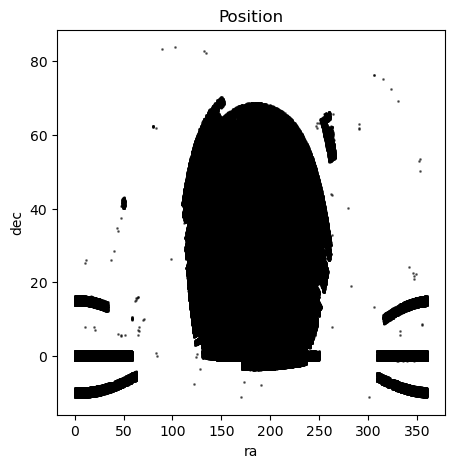

In [4]:
ra0 = data0['ra']
dec0 = data0['dec']

plt.figure(figsize=(5,5))
plt.scatter(ra0, dec0, c='k', s=1, alpha=0.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position')
plt.show()

C:\Users\seohyun\AppData\Local\Temp\ipykernel_21752\707661114.py:4: RuntimeWarning: invalid value encountered in log10
  Mr0 = r_mag0 - 5.0 * np.log10(dL0) - 25.0


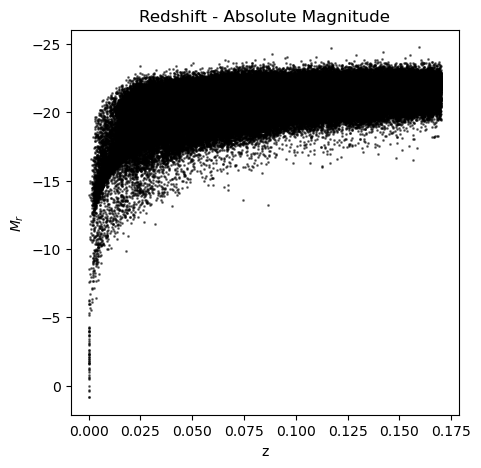

In [5]:
z0 = data0['z']
r_mag0 = data0['petroMag_r']
dL0 = cosmo.luminosity_distance(z0).value
Mr0 = r_mag0 - 5.0 * np.log10(dL0) - 25.0

plt.figure(figsize=(5,5))
plt.scatter(z0, Mr0, c='k', s=1, alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.title('Redshift - Absolute Magnitude')
plt.show()

In [6]:
print(len(data0['specObjID']))
print(np.where(dL0 <= 0)[0])
print(dL0[np.where(dL0 <= 0)[0]])

441620
[  3644  24448  69577  78203  86452 110262 117009 127743 137640 141437
 147042 152577 153367 163047 163212 167026 167190 175760 179749 187327
 199691 219409 221797 230821 238294 238651 242970 250091 253939 259808
 279970 283049 287840 299861 303084 305033 306636 307100 307122 311242
 316512 316702 318638 319970 321646 322073 326058 340432 347242 352428
 368309 374261 385165 385259 385931 389503 391834 409064 409153 422617
 424967 425109 428711]
[-0.13610012 -3.41139556 -0.33587392 -0.37804621 -0.96462733 -1.56887343
 -1.5684183  -1.20936277 -0.0943184  -0.78735685 -0.04458014 -0.16092914
 -0.23554398 -2.00087945 -0.27390608 -0.06773003 -0.01135604 -0.31982292
 -2.38828563 -1.8321354  -0.64047846 -0.09616454 -1.78814346 -0.10268353
 -0.79018616 -0.21831097 -1.89001431 -0.54319657 -0.03383465 -0.12875677
 -0.05011938 -0.39420289 -1.63098544 -0.11812149 -0.07559397 -2.35296504
 -0.8811044  -2.21849455 -2.67397113 -0.25837222 -0.22783764 -1.18224749
 -0.22943888 -0.10477227 -0.59160

In [7]:
# criteria
cri_mr = data0['petroMag_r'] < 17.77

z0 = data0['z']
dL0 = cosmo.luminosity_distance(z0).value
Mr0 = data0['petroMag_r'] - 5 * np.log10(dL0) - 25
Mr_limit = 17.77 - 5 * np.log10(np.max(dL0)) - 25
cri_Mr = Mr0 < Mr_limit

cri_dL = dL0 > 0

cri = cri_mr & cri_Mr & cri_dL
data = data0[cri]
print(len(data0['specObjID']), 'to', len(data['specObjID']))
print(f"Mr limit : {Mr_limit}")

441620 to 68267
Mr limit : -21.819396214977044


C:\Users\seohyun\AppData\Local\Temp\ipykernel_21752\2301063153.py:6: RuntimeWarning: invalid value encountered in log10
  Mr0 = data0['petroMag_r'] - 5 * np.log10(dL0) - 25


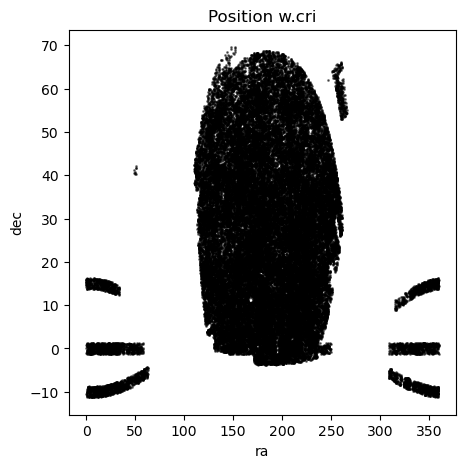

In [8]:
ra = data['ra']
dec = data['dec']

plt.figure(figsize=(5,5))
plt.scatter(ra, dec, c='k', s=1, alpha=0.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position w.cri')
plt.show()

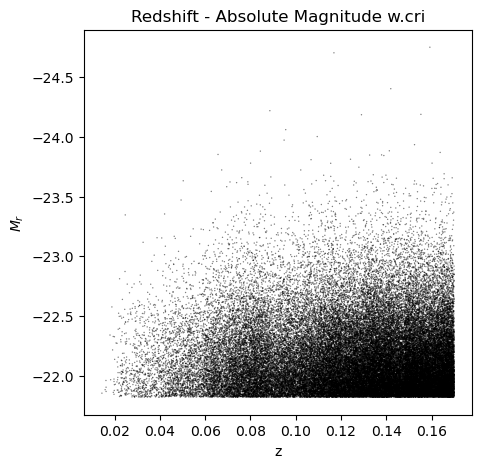

In [9]:
z = data['z']
r_mag = data['petroMag_r']
dL = cosmo.luminosity_distance(z).value
Mr = r_mag - 5.0 * np.log10(dL) - 25.0

fig = plt.figure(figsize=(5,5))
plt.scatter(z, Mr, c='k', s=1, alpha=0.5, edgecolor='None')
plt.gca().invert_yaxis()
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.title('Redshift - Absolute Magnitude w.cri')
plt.show()

In [10]:
# 'h_alpha_flux' 'h_beta_flux' 'oiii_5007_flux' 'oi_6300_flux' 'nii_6584_flux' 'sii_6717_flux' 'sii_6731_flux' 'h_delta_flux'

oiii = data['oiii_5007_flux']
nii = data['nii_6584_flux']
siiw = data['sii_6717_flux']
siis = data['sii_6731_flux']
oi = data['oi_6300_flux']
ha = data['h_alpha_flux']
hb = data['h_beta_flux']
hd = data['h_delta_flux']

In [11]:
cri_mon1 = oiii / hb > 0
cri_mon2 = nii / ha > 0
cri_mon = cri_mon1 & cri_mon2

print(len(oiii), len(oiii[cri_mon]))

68267 68267


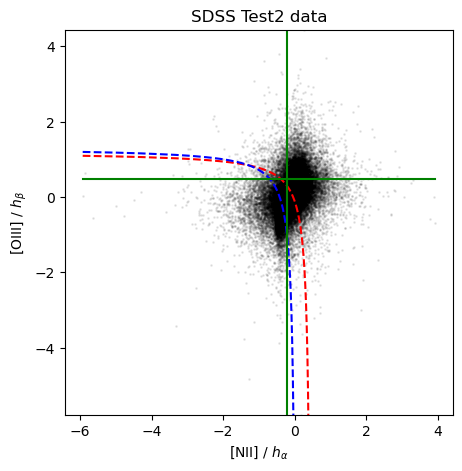

In [33]:
oiii_hb = np.log10(oiii[cri_mon] / hb[cri_mon])
nii_ha = np.log10(nii[cri_mon] / ha[cri_mon])

xline_nii_ha = nii_ha[nii_ha < 0.47]
yline_nii_ha = 0.61 / (nii_ha[nii_ha < 0.47] - 0.47) + 1.19
s = xline_nii_ha.argsort()
x_nii_ha = xline_nii_ha[s]
y_nii_ha = yline_nii_ha[s]

xline2_nii_ha = nii_ha[nii_ha < 0.05]
yline2_nii_ha = 0.61 / (nii_ha[nii_ha < 0.05] - 0.05) + 1.3
s = xline2_nii_ha.argsort()
x2_nii_ha = xline2_nii_ha[s]
y2_nii_ha = yline2_nii_ha[s]

plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1, alpha=0.08)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.show()

In [13]:
# Seyferts vs. LINERs
agn = []
for i in range(len(nii_ha)):
    if oiii_hb[i] > 0.61 / (nii_ha[i] - 0.47) + 1.19 or nii_ha[i] > 0.47:
        agn.append(i)

sey1 = nii_ha[agn] > np.log10(0.6)
sey2 = oiii_hb[agn] > np.log10(3)
sey = sey1 & sey2
print(sey)

liner1 = nii_ha[agn] > np.log10(0.6)
liner2 = oiii_hb[agn] < np.log10(3)
liner = liner1 & liner2
print(liner)

[False False False ... False False False]
[ True  True  True ...  True  True  True]


In [14]:
print(len(np.where(sey == True)[0]), len(np.where(liner == True)[0]))

8308 21655


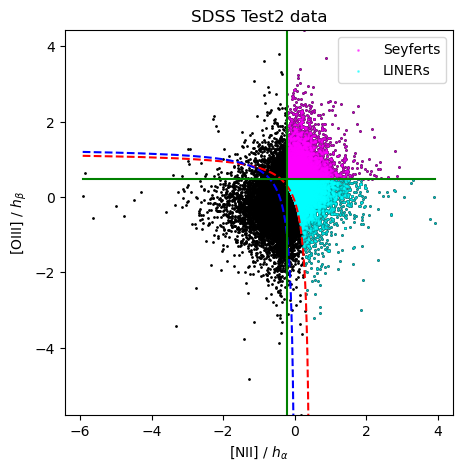

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.scatter(nii_ha[agn][sey], oiii_hb[agn][sey], c='magenta', s=1, alpha=0.5, label='Seyferts')
plt.scatter(nii_ha[agn][liner], oiii_hb[agn][liner], c='cyan', s=1, alpha=0.5, label='LINERs')
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.legend()
plt.show()

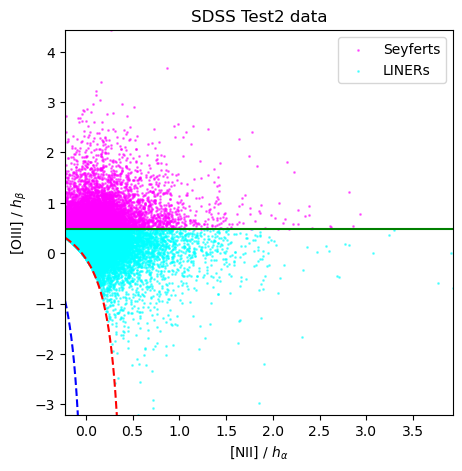

In [16]:
# same image, more precise
plt.figure(figsize=(5,5))
plt.scatter(nii_ha[agn][sey], oiii_hb[agn][sey], c='magenta', s=1, alpha=0.5, label='Seyferts')
plt.scatter(nii_ha[agn][liner], oiii_hb[agn][liner], c='cyan', s=1, alpha=0.5, label='LINERs')
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.xlim(min(nii_ha[agn][sey]), max(nii_ha[agn]))
plt.ylim(min(oiii_hb[agn][liner]), max(oiii_hb[agn][sey]))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.legend()
plt.show()

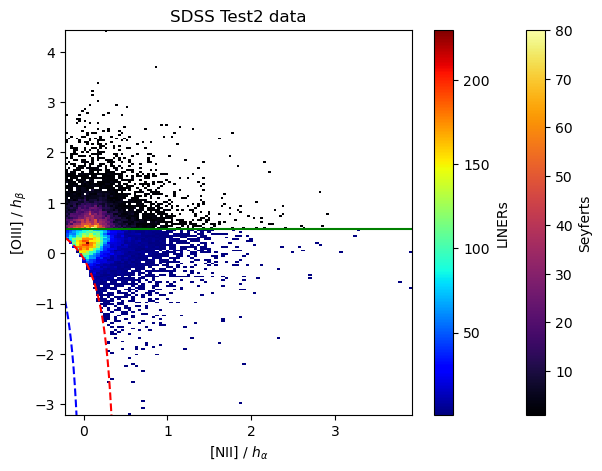

In [17]:
fig = plt.figure(figsize=(7,5))
h_sey = plt.hist2d(x=nii_ha[agn][sey], y=oiii_hb[agn][sey], bins=100, cmin=1, cmap='inferno', label='Seyferts')
fig.colorbar(h_sey[3], ax=plt.gca(), label='Seyferts')
h_liner = plt.hist2d(x=nii_ha[agn][liner], y=oiii_hb[agn][liner], bins=100, cmin=1, cmap='jet', label='LINERs')
fig.colorbar(h_liner[3], ax=plt.gca(), label='LINERs')

plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.xlim(min(nii_ha[agn][sey]), max(nii_ha[agn]))
plt.ylim(min(oiii_hb[agn][liner]), max(oiii_hb[agn][sey]))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.show()

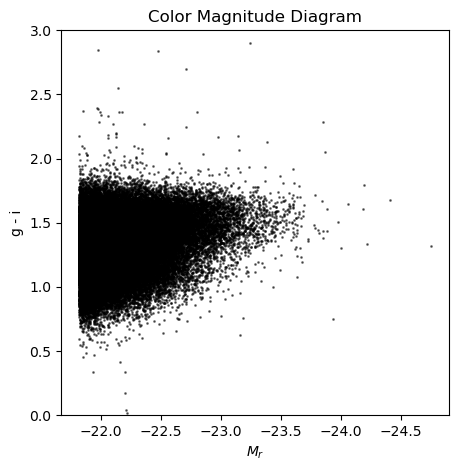

In [18]:
# CMD
g = data['petroMag_g']
i = data['petroMag_i']
g_i = g - i

plt.figure(figsize=(5,5))
plt.scatter(Mr, g_i, c='k', s=1, alpha=0.5)
plt.gca().invert_xaxis()
plt.ylim(0, 3)
plt.xlabel('$M_r$')
plt.ylabel('g - i')
plt.title('Color Magnitude Diagram')
plt.show()

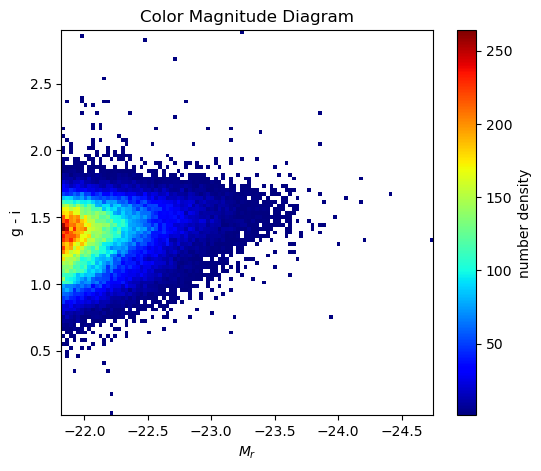

In [19]:
plt.figure(figsize=(6,5))
plt.xlabel('$M_r$')
plt.ylabel('g - i')
plt.title('Color Magnitude Diagram')
gi1 = g_i > 0
gi2 = g_i < 3
gi_0_3 = gi1 & gi2
h_cmd = plt.hist2d(x=Mr[gi_0_3], y=g_i[gi_0_3], bins=100, cmin=1, cmap='jet', label='number density')
plt.gca().invert_xaxis()
fig.colorbar(h_cmd[3], ax=plt.gca(), label='number density')

plt.show()

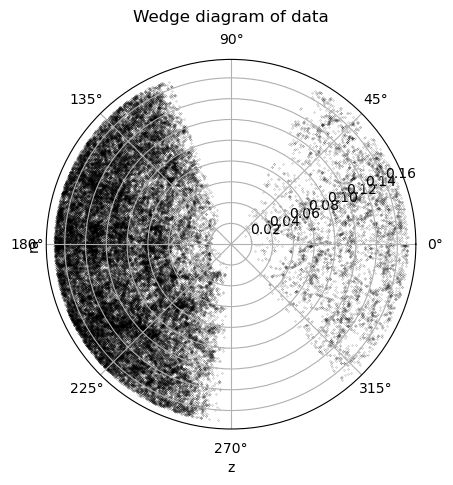

In [20]:
# Binning

# Wedge diagram
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
plt.show()

In [21]:
z = data['z']

binned = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16]
binning = 0.001
for i in binned:
    z_1 = z > i - binning
    z_2 = z < i + binning
    z_t = z_1 & z_2
    globals()['z{}_bin'.format(int(i * 100))] = z_t
    globals()['z{}'.format(int(i * 100))] = data[z_t]

print(len(z2), len(z4), len(z6), len(z8), len(z10), len(z12), len(z14), len(z16))

12 112 350 733 765 1226 1665 1726


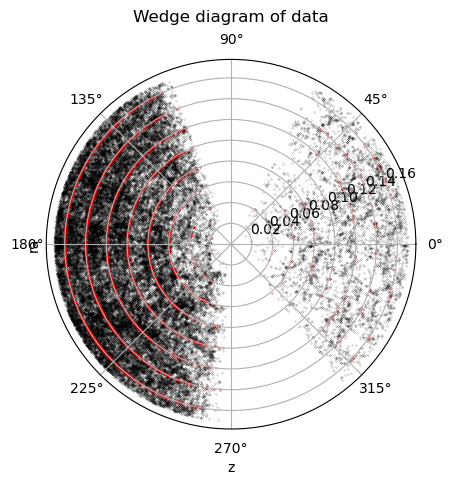

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)
for i in binned:
    ax.scatter(ra[globals()['z{}_bin'.format(int(i * 100))]] * np.pi / 180, z[globals()['z{}_bin'.format(int(i * 100))]],
               marker='.', color='red', s=0.1, alpha=0.75, label=f'z = {i}')

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
# plt.legend()
plt.show()

In [23]:
z = data['z']
z_agn = data['z'][agn]
z_sey = data['z'][agn][sey]
z_liner = data['z'][agn][liner]

binned_final = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17]
binning_final = 0.005
for i in binned_final:
    z_1_final = z >= i - binning_final
    z_2_final = z < i + binning_final
    z_t_final = z_1_final & z_2_final
    globals()['z{}_bin_final'.format(int(i * 100))] = z_t_final
    globals()['z{}_final'.format(int(i * 100))] = data[z_t_final]
    
    z_agn_1_final = z_agn >= i - binning_final
    z_agn_2_final = z_agn < i + binning_final
    z_agn_t_final = z_agn_1_final & z_agn_2_final
    globals()['z{}_agn_bin_final'.format(int(i * 100))] = z_agn_t_final
    globals()['z{}_agn_final'.format(int(i * 100))] = data[agn][z_agn_t_final]
    
    z_sey_1_final = z_sey >= i - binning_final
    z_sey_2_final = z_sey < i + binning_final
    z_sey_t_final = z_sey_1_final & z_sey_2_final
    globals()['z{}_sey_bin_final'.format(int(i * 100))] = z_sey_t_final
    globals()['z{}_sey_final'.format(int(i * 100))] = data[agn][sey][z_sey_t_final]
    
    z_liner_1_final = z_liner >= i - binning_final
    z_liner_2_final = z_liner < i + binning_final
    z_liner_t_final = z_liner_1_final & z_liner_2_final
    globals()['z{}_liner_bin_final'.format(int(i * 100))] = z_liner_t_final
    globals()['z{}_liner_final'.format(int(i * 100))] = data[agn][liner][z_liner_t_final]

for j in binned_final:
    print(f"bin center {j} with +/- {binning_final} : {len(globals()['z{}_final'.format(int(j * 100))])}")

bin center 0.02 with +/- 0.005 : 109
bin center 0.03 with +/- 0.005 : 373
bin center 0.04 with +/- 0.005 : 608
bin center 0.05 with +/- 0.005 : 1075
bin center 0.06 with +/- 0.005 : 1667
bin center 0.07 with +/- 0.005 : 2674
bin center 0.08 with +/- 0.005 : 3736
bin center 0.09 with +/- 0.005 : 3520
bin center 0.1 with +/- 0.005 : 3998
bin center 0.11 with +/- 0.005 : 5150
bin center 0.12 with +/- 0.005 : 6398
bin center 0.13 with +/- 0.005 : 7624
bin center 0.14 with +/- 0.005 : 8181
bin center 0.15 with +/- 0.005 : 8801
bin center 0.16 with +/- 0.005 : 9217
bin center 0.17 with +/- 0.005 : 5136


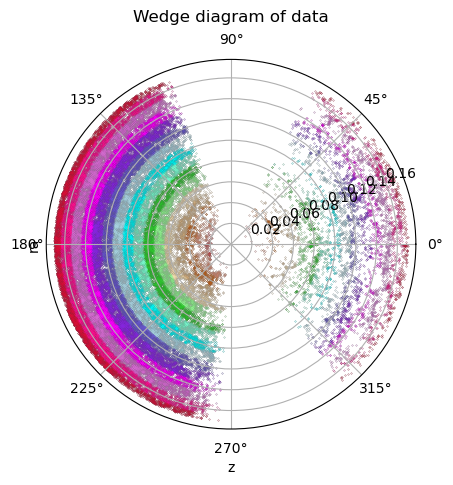

In [24]:
coloring = ['indianred', 'darksalmon', 'chocolate', 'burlywood', 'wheat', 'palegreen',
            'limegreen', 'aquamarine', 'aqua', 'lightblue', 'slateblue', 'blueviolet',
            'magenta', 'orchid', 'deeppink', 'crimson']

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)
n = 0
for i in binned_final:
    ax.scatter(ra[globals()['z{}_bin_final'.format(int(i * 100))]] * np.pi / 180, z[globals()['z{}_bin_final'.format(int(i * 100))]],
               marker='.', color=coloring[n], s=0.1, alpha=0.75, label=f'z = {i}')
    n += 1

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
# plt.legend()
plt.show()

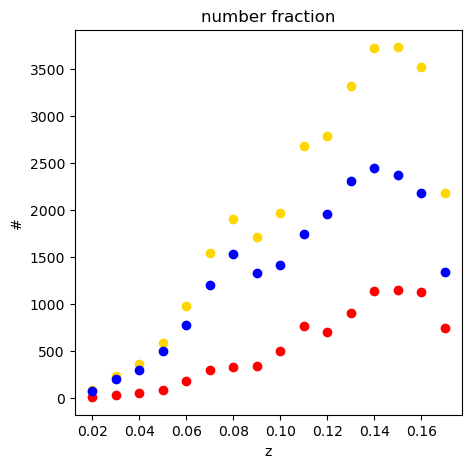

In [25]:
plt.figure(figsize=(5,5))
for i in binned_final:
    # plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]),
    #          marker='o', color='gray', label='all')
    plt.plot(i, len(globals()['z{}_agn_final'.format(int(i * 100))]),
             marker='o', color='gold', label='AGN')
    plt.plot(i, len(globals()['z{}_sey_final'.format(int(i * 100))]),
             marker='o', color='red', label='Seyfert')
    plt.plot(i, len(globals()['z{}_liner_final'.format(int(i * 100))]),
             marker='o', color='blue', label='LINER')
plt.xlabel('z')
plt.ylabel('#')
plt.title('number fraction')
# plt.legend()
plt.show()

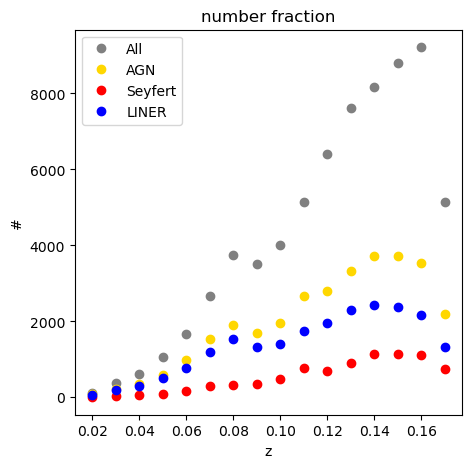

In [61]:
frac_all = [binned_final, []]
frac_agn = [binned_final, []]
frac_sey = [binned_final, []]
frac_liner = [binned_final, []]
for i in binned_final:
    frac_all[1].append(len(globals()['z{}_final'.format(int(i * 100))]))
    frac_agn[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]))
    frac_sey[1].append(len(globals()['z{}_sey_final'.format(int(i * 100))]))
    frac_liner[1].append(len(globals()['z{}_liner_final'.format(int(i * 100))]))

plt.figure(figsize=(5,5))
plt.plot(frac_all[0], frac_all[1], marker='o', ls='', color='gray', label='All')
plt.plot(frac_agn[0], frac_agn[1], marker='o', ls='', color='gold', label='AGN')
plt.plot(frac_sey[0], frac_sey[1], marker='o', ls='', color='red', label='Seyfert')
plt.plot(frac_liner[0], frac_liner[1], marker='o', ls='', color='blue', label='LINER')

plt.xlabel('z')
plt.ylabel('#')
plt.title('number fraction')
plt.legend()
plt.show()

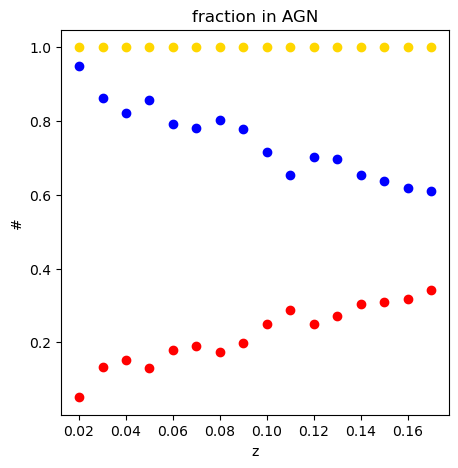

In [26]:
plt.figure(figsize=(5,5))
for i in binned_final:
    sum_agn = len(globals()['z{}_agn_final'.format(int(i * 100))])
    # plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]),
    #          marker='o', color='gray', label='all')
    plt.plot(i, len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_agn,
             marker='o', color='gold', label='AGN')
    plt.plot(i, len(globals()['z{}_sey_final'.format(int(i * 100))]) / sum_agn,
             marker='o', color='red', label='Seyfert')
    plt.plot(i, len(globals()['z{}_liner_final'.format(int(i * 100))]) / sum_agn,
             marker='o', color='blue', label='LINER')
plt.xlabel('z')
plt.ylabel('#')
plt.title('fraction in AGN')
# plt.legend()
plt.show()

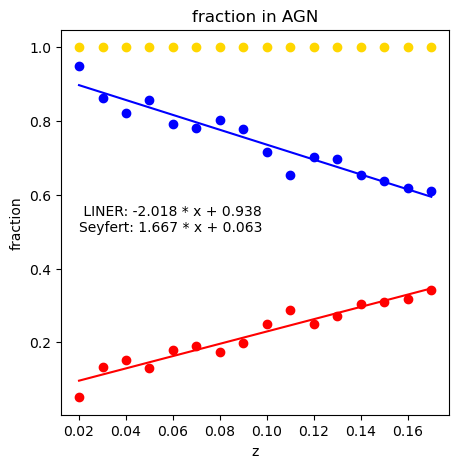

In [27]:
# fiducial line (curve fit)
frac_agn_agn = [binned_final, []]
frac_sey_agn = [binned_final, []]
frac_liner_agn = [binned_final, []]
for i in binned_final:
    sum_agn = len(globals()['z{}_agn_final'.format(int(i * 100))])
    # plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]),
    #          marker='o', color='gray', label='all')
    frac_agn_agn[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_agn)
    frac_sey_agn[1].append(len(globals()['z{}_sey_final'.format(int(i * 100))]) / sum_agn)
    frac_liner_agn[1].append(len(globals()['z{}_liner_final'.format(int(i * 100))]) / sum_agn)

frac_agn_agn = np.array(frac_agn_agn)
frac_sey_agn = np.array(frac_sey_agn)
frac_liner_agn = np.array(frac_liner_agn)

def f(x, a, b):
    return a * x + b

popt_sey, pcov_sey = curve_fit(f, frac_sey_agn[0], frac_sey_agn[1])
popt_liner, pcov_liner = curve_fit(f, frac_liner_agn[0], frac_liner_agn[1])

plt.figure(figsize=(5,5))
plt.plot(frac_agn_agn[0], frac_agn_agn[1], marker='o', ls='', color='gold', label='AGN')
plt.plot(frac_sey_agn[0], frac_sey_agn[1], marker='o', ls='', color='red', label='Seyfert')
plt.plot(frac_liner_agn[0], frac_liner_agn[1], marker='o', ls='', color='blue', label='LINER')

plt.plot(frac_sey_agn[0], f(frac_sey_agn[0], popt_sey[0], popt_sey[1]), 'r-')
plt.plot(frac_liner_agn[0], f(frac_liner_agn[0], popt_liner[0], popt_liner[1]), 'b-')
plt.xlabel('z')
plt.ylabel('fraction')
plt.title('fraction in AGN')
plt.text(0.02, 0.5, f' LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})\n\
Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')
# plt.legend()
plt.show()

percent : 0.7155963302752294
percent : 0.6246648793565683
percent : 0.5855263157894737
percent : 0.5413953488372093
percent : 0.5884823035392921
percent : 0.5744203440538519
percent : 0.5080299785867237
percent : 0.48465909090909093
percent : 0.49149574787393696
percent : 0.52
percent : 0.436230071897468
percent : 0.4354669464847849
percent : 0.4559344823371226
percent : 0.4241563458697875
percent : 0.3825539763480525
percent : 0.4254283489096573


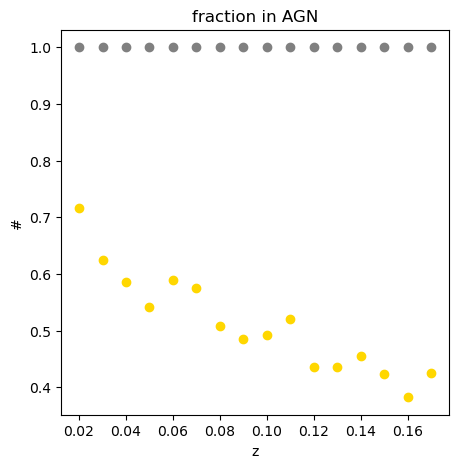

In [28]:
plt.figure(figsize=(5,5))
for i in binned_final:
    sum_all = len(globals()['z{}_final'.format(int(i * 100))])
    plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]) / sum_all,
             marker='o', color='gray', label='all')
    plt.plot(i, len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_all,
             marker='o', color='gold', label='AGN')
    print(f"percent : {len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_all}")
    # plt.plot(i, len(globals()['z{}_sey_final'.format(int(i * 100))]) / sum_all,
    #          marker='o', color='red', label='Seyfert')
    # plt.plot(i, len(globals()['z{}_liner_final'.format(int(i * 100))]) / sum_all,
    #          marker='o', color='blue', label='LINER')
plt.xlabel('z')
plt.ylabel('#')
plt.title('fraction in All')
# plt.legend()
plt.show()

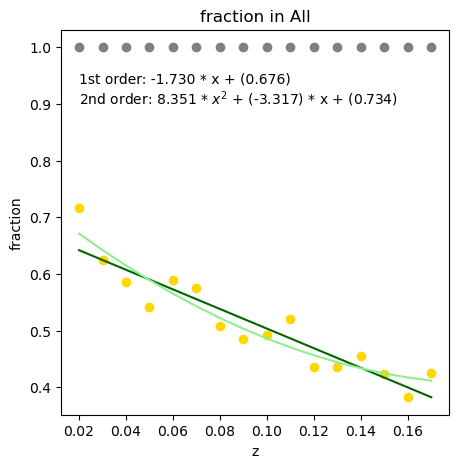

In [37]:
# fiducial line (curve fit)
frac_all_all = [binned_final, []]
frac_agn_all = [binned_final, []]
for i in binned_final:
    sum_all = len(globals()['z{}_final'.format(int(i * 100))])
    # plt.plot(i, len(globals()['z{}_final'.format(int(i * 100))]),
    #          marker='o', color='gray', label='all')
    frac_all_all[1].append(len(globals()['z{}_final'.format(int(i * 100))]) / sum_all)
    frac_agn_all[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_all)

frac_all_all = np.array(frac_all_all)
frac_agn_all = np.array(frac_agn_all)

def f(x, a, b):
    return a * x + b

def f2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_agn, pcov_agn = curve_fit(f, frac_agn_all[0], frac_agn_all[1])
popt_agn2, pcov_agn2 = curve_fit(f2, frac_agn_all[0], frac_agn_all[1])

plt.figure(figsize=(5,5))
plt.plot(frac_all_all[0], frac_all_all[1], marker='o', ls='', color='gray', label='All')
plt.plot(frac_agn_all[0], frac_agn_all[1], marker='o', ls='', color='gold', label='AGN')

plt.plot(frac_agn_all[0], f(frac_agn_all[0], popt_agn[0], popt_agn[1]), c='darkgreen')
plt.plot(frac_agn_all[0], f2(frac_agn_all[0], popt_agn2[0], popt_agn2[1], popt_agn2[2]), c='lightgreen')
plt.xlabel('z')
plt.ylabel('fraction')
plt.title('fraction in All')
plt.text(0.02, 0.9, f'1st order: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})\n\
2nd order: {popt_agn2[0]:.3f} $x^2$ + ({popt_agn2[1]:.3f}) $x$ + ({popt_agn2[2]:.3f})')
# plt.legend()
plt.show()

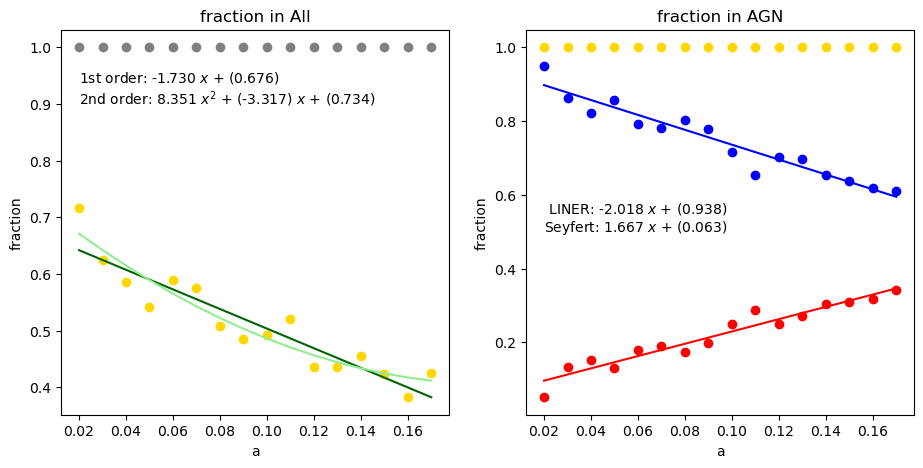

In [63]:
# All in one

# fiducial line (curve fit)
frac_all_all = [binned_final, []]
frac_agn_all = [binned_final, []]

frac_agn_agn = [binned_final, []]
frac_sey_agn = [binned_final, []]
frac_liner_agn = [binned_final, []]

for i in binned_final:
    sum_all = len(globals()['z{}_final'.format(int(i * 100))])
    frac_all_all[1].append(len(globals()['z{}_final'.format(int(i * 100))]) / sum_all)
    frac_agn_all[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_all)
    
    sum_agn = len(globals()['z{}_agn_final'.format(int(i * 100))])
    frac_agn_agn[1].append(len(globals()['z{}_agn_final'.format(int(i * 100))]) / sum_agn)
    frac_sey_agn[1].append(len(globals()['z{}_sey_final'.format(int(i * 100))]) / sum_agn)
    frac_liner_agn[1].append(len(globals()['z{}_liner_final'.format(int(i * 100))]) / sum_agn)

frac_all_all = np.array(frac_all_all)
frac_agn_all = np.array(frac_agn_all)

frac_agn_agn = np.array(frac_agn_agn)
frac_sey_agn = np.array(frac_sey_agn)
frac_liner_agn = np.array(frac_liner_agn)

def f(x, a, b):
    return a * x + b

def f2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_agn, pcov_agn = curve_fit(f, frac_agn_all[0], frac_agn_all[1])
popt_agn2, pcov_agn2 = curve_fit(f2, frac_agn_all[0], frac_agn_all[1])

popt_sey, pcov_sey = curve_fit(f, frac_sey_agn[0], frac_sey_agn[1])
popt_liner, pcov_liner = curve_fit(f, frac_liner_agn[0], frac_liner_agn[1])


# plot
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_all_all[0], frac_all_all[1], marker='o', ls='', color='gray', label='All')
ax0.plot(frac_agn_all[0], frac_agn_all[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(frac_agn_all[0], f(frac_agn_all[0], popt_agn[0], popt_agn[1]), c='darkgreen')
ax0.plot(frac_agn_all[0], f2(frac_agn_all[0], popt_agn2[0], popt_agn2[1], popt_agn2[2]), c='lightgreen')
ax0.text(0.02, 0.9, f'1st order: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})\n\
2nd order: {popt_agn2[0]:.3f} $x^2$ + ({popt_agn2[1]:.3f}) $x$ + ({popt_agn2[2]:.3f})')

ax0.set_xlabel('a')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')

ax1.plot(frac_agn_agn[0], frac_agn_agn[1], marker='o', ls='', color='gold', label='AGN')
ax1.plot(frac_sey_agn[0], frac_sey_agn[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(frac_liner_agn[0], frac_liner_agn[1], marker='o', ls='', color='blue', label='LINER')
ax1.plot(frac_sey_agn[0], f(frac_sey_agn[0], popt_sey[0], popt_sey[1]), 'r-')
ax1.plot(frac_liner_agn[0], f(frac_liner_agn[0], popt_liner[0], popt_liner[1]), 'b-')
ax1.text(0.02, 0.5, f' LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})\n\
Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')

ax1.set_xlabel('a')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')

# plt.legend()
plt.show()

In [68]:
# x-axis: z -> a

binned_a = 1 / (1 + np.array(binned_final))
binning_a = 1 / (1 + 0.005)
for i in binned_a:
    z_1_a = z >= i - binning_a
    z_2_a = z < i + binning_a
    z_t_a = z_1_a & z_2_a
    globals()['z{}_bin_a'.format(int(i * 100))] = z_t_a
    globals()['z{}_a'.format(int(i * 100))] = data[z_t_a]
    
    z_agn_1_a = z_agn >= i - binning_a
    z_agn_2_a = z_agn < i + binning_a
    z_agn_t_a = z_agn_1_a & z_agn_2_a
    globals()['z{}_agn_bin_a'.format(int(i * 100))] = z_agn_t_a
    globals()['z{}_agn_a'.format(int(i * 100))] = data[agn][z_agn_t_a]
    
    z_sey_1_a = z_sey >= i - binning_a
    z_sey_2_a = z_sey < i + binning_a
    z_sey_t_a = z_sey_1_a & z_sey_2_a
    globals()['z{}_sey_bin_a'.format(int(i * 100))] = z_sey_t_a
    globals()['z{}_sey_a'.format(int(i * 100))] = data[agn][sey][z_sey_t_a]
    
    z_liner_1_a = z_liner >= i - binning_a
    z_liner_2_a = z_liner < i + binning_a
    z_liner_t_a = z_liner_1_a & z_liner_2_a
    globals()['z{}_liner_bin_a'.format(int(i * 100))] = z_liner_t_a
    globals()['z{}_liner_a'.format(int(i * 100))] = data[agn][liner][z_liner_t_a]

for j in binned_a:
    print(f"bin center {j} with +/- {binning_a} : {len(globals()['z{}_a'.format(int(j * 100))])}")

bin center 0.9803921568627451 with +/- 0.9950248756218907 : 68267
bin center 0.970873786407767 with +/- 0.9950248756218907 : 68267
bin center 0.9615384615384615 with +/- 0.9950248756218907 : 68267
bin center 0.9523809523809523 with +/- 0.9950248756218907 : 68267
bin center 0.9433962264150942 with +/- 0.9950248756218907 : 68267
bin center 0.9345794392523364 with +/- 0.9950248756218907 : 68267
bin center 0.9259259259259258 with +/- 0.9950248756218907 : 68267
bin center 0.9174311926605504 with +/- 0.9950248756218907 : 68267
bin center 0.9090909090909091 with +/- 0.9950248756218907 : 68267
bin center 0.9009009009009008 with +/- 0.9950248756218907 : 68267
bin center 0.8928571428571428 with +/- 0.9950248756218907 : 68267
bin center 0.8849557522123894 with +/- 0.9950248756218907 : 68267
bin center 0.8771929824561403 with +/- 0.9950248756218907 : 68267
bin center 0.8695652173913044 with +/- 0.9950248756218907 : 68267
bin center 0.8620689655172414 with +/- 0.9950248756218907 : 68267
bin center 

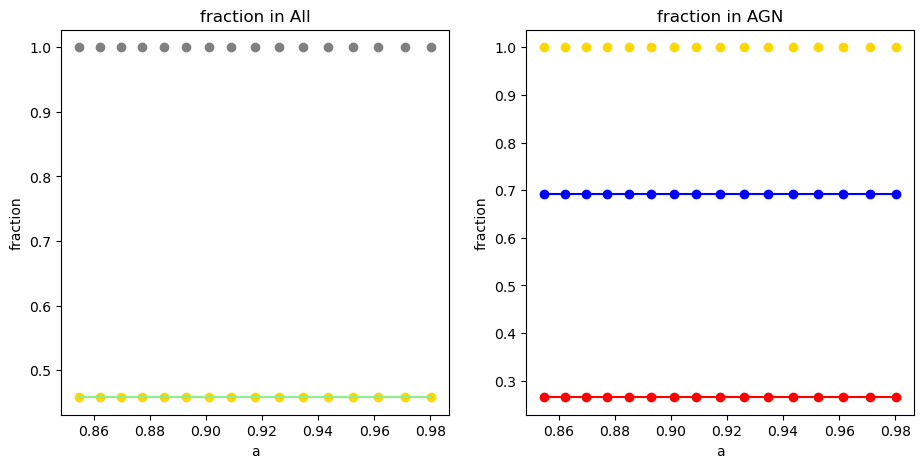

In [70]:
# x-axis: z -> a
# All in one

# fiducial line (curve fit)
afrac_all_all = [binned_a, []]
afrac_agn_all = [binned_a, []]

afrac_agn_agn = [binned_a, []]
afrac_sey_agn = [binned_a, []]
afrac_liner_agn = [binned_a, []]

for i in binned_final:
    asum_all = len(globals()['z{}_a'.format(int(i * 100))])
    afrac_all_all[1].append(len(globals()['z{}_a'.format(int(i * 100))]) / asum_all)
    afrac_agn_all[1].append(len(globals()['z{}_agn_a'.format(int(i * 100))]) / asum_all)
    
    asum_agn = len(globals()['z{}_agn_final'.format(int(i * 100))])
    afrac_agn_agn[1].append(len(globals()['z{}_agn_a'.format(int(i * 100))]) / asum_agn)
    afrac_sey_agn[1].append(len(globals()['z{}_sey_a'.format(int(i * 100))]) / asum_agn)
    afrac_liner_agn[1].append(len(globals()['z{}_liner_a'.format(int(i * 100))]) / asum_agn)

afrac_all_all = np.array(afrac_all_all)
afrac_agn_all = np.array(afrac_agn_all)

afrac_agn_agn = np.array(afrac_agn_agn)
afrac_sey_agn = np.array(afrac_sey_agn)
afrac_liner_agn = np.array(afrac_liner_agn)

def f(x, a, b):
    return a * x + b

def f2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_agn, pcov_agn = curve_fit(f, afrac_agn_all[0], afrac_agn_all[1])
popt_agn2, pcov_agn2 = curve_fit(f2, afrac_agn_all[0], afrac_agn_all[1])

popt_sey, pcov_sey = curve_fit(f, afrac_sey_agn[0], afrac_sey_agn[1])
popt_liner, pcov_liner = curve_fit(f, afrac_liner_agn[0], afrac_liner_agn[1])


# plot
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(afrac_all_all[0], afrac_all_all[1], marker='o', ls='', color='gray', label='All')
ax0.plot(afrac_agn_all[0], afrac_agn_all[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(afrac_agn_all[0], f(afrac_agn_all[0], popt_agn[0], popt_agn[1]), c='darkgreen')
ax0.plot(afrac_agn_all[0], f2(afrac_agn_all[0], popt_agn2[0], popt_agn2[1], popt_agn2[2]), c='lightgreen')
# ax0.text(0.02, 0.9, f'1st order: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})\n\
# 2nd order: {popt_agn2[0]:.3f} $x^2$ + ({popt_agn2[1]:.3f}) $x$ + ({popt_agn2[2]:.3f})')

ax0.set_xlabel('a')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')

ax1.plot(afrac_agn_agn[0], afrac_agn_agn[1], marker='o', ls='', color='gold', label='AGN')
ax1.plot(afrac_sey_agn[0], afrac_sey_agn[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(afrac_liner_agn[0], afrac_liner_agn[1], marker='o', ls='', color='blue', label='LINER')
ax1.plot(afrac_sey_agn[0], f(afrac_sey_agn[0], popt_sey[0], popt_sey[1]), 'r-')
ax1.plot(afrac_liner_agn[0], f(afrac_liner_agn[0], popt_liner[0], popt_liner[1]), 'b-')
# ax1.text(0.02, 0.5, f' LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})\n\
# Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')

ax1.set_xlabel('a')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')

# plt.legend()
plt.show()

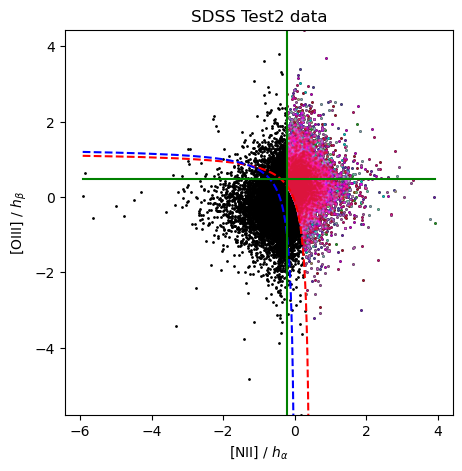

In [29]:
# z binning in BPT
plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')
n = 0
for i in binned_final:
    plt.scatter(nii_ha[agn][sey][globals()['z{}_sey_bin_final'.format(int(i * 100))]],
                oiii_hb[agn][sey][globals()['z{}_sey_bin_final'.format(int(i * 100))]],
                c=coloring[n], s=1, alpha=0.5, label='Seyferts in z=0.02')
    plt.scatter(nii_ha[agn][liner][globals()['z{}_liner_bin_final'.format(int(i * 100))]],
                oiii_hb[agn][liner][globals()['z{}_liner_bin_final'.format(int(i * 100))]],
                c=coloring[n], s=1, alpha=0.5, label='LINERs in')
    n += 1
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
# plt.legend()
plt.show()

In [30]:
# # z binning in BPT
# n = 0
# for i in binned_final:
#     plt.figure(figsize=(5,5))
#     plt.scatter(nii_ha, oiii_hb, c='k', s=1)
#     plt.plot(x_nii_ha, y_nii_ha, 'r--')
#     plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
#     plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
#     plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

#     plt.scatter(nii_ha[agn][sey][globals()['z{}_sey_bin_final'.format(int(i * 100))]],
#                 oiii_hb[agn][sey][globals()['z{}_sey_bin_final'.format(int(i * 100))]],
#                 c=coloring[n], s=1, alpha=0.5, label='Seyferts in z=0.02')
#     plt.scatter(nii_ha[agn][liner][globals()['z{}_liner_bin_final'.format(int(i * 100))]],
#                 oiii_hb[agn][liner][globals()['z{}_liner_bin_final'.format(int(i * 100))]],
#                 c=coloring[n], s=1, alpha=0.5, label='LINERs in')
#     n += 1
#     plt.ylim(min(oiii_hb), max(oiii_hb))

#     plt.xlabel(r'[NII] / $h_{\alpha}$')
#     plt.ylabel(r'[OIII] / $h_{\beta}$')
#     plt.title('SDSS Test2 data')
#     # plt.legend()
#     plt.show()